<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/0904(%EC%9B%94)_%EA%B3%BC%EC%A0%9C_%ED%95%B8%EC%A6%88%EC%98%A8_3%EC%9E%A5_%EB%B6%84%EB%A5%98_p_127_154_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0904(월) 과제_핸즈온 3장 분류 p.127-154 필사

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

# CHAPTER 3

## 3.1 MNIST
MNIST 데이터셋: 고등학생과 미국 인구조사국 직원들이 손으로 쓴 70,000개의 작은 숫자 이미지를 모은 데이터
- 새로운 분류 알고리즘이 나올 때마다 MNIST 데이터셋이 얼마나 잘 작동하는지 보게 하는 유명한 데이터셋

1. MNIST 데이터셋 내려 받기
- 사이킷런에서 제공하는 여러 헬퍼 함수를 사용해 MNIST 등 잘 알려진 데이터셋 내려받을 수 있음

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 사이킷런에서 읽어 들인 데이터셋 : 일반적으로 비슷한 딕셔너리 구조
 - 데이터셋을 설명하는 DESCR 키
 - 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키


2. 배열 살펴보기
 - 70,000개의 이미지, 각 이미지 784개의 특성
 - 28*28 픽셀의 이미지
 - 특성 : 0(흰색) ~ 255(검은색)까지의 픽셀 강도

In [2]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

3. 데이터셋에서 이미지 하나 확인해보기
 - 샘플의 특성 벡터 추출해서 28*28 배열로 크기를 바꾸고 맥플롯립의 imshow() 함수 사용해 그리기

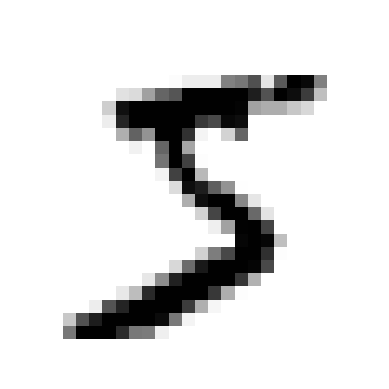

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

3.2. 실제 레이블을 확인해보기

In [5]:
y[0]

'5'

3.3. 문자열인 레이블 y를 정수로 변환하기

In [6]:
import numpy as np

y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

*MNIST 이미지 샘플을 더 확인해보기 -  분류 작업이 얼마나 어려운지 확인해보기

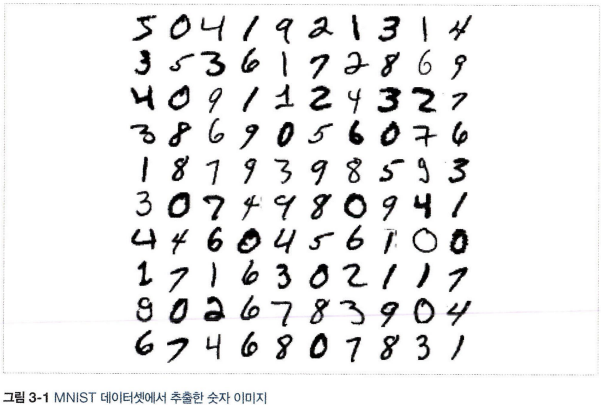

## 3.2 이진 분류기 훈련
이진 분류기 : 한 개의 클래스가 맞는지, 그 클래스가 아닌지만을 분류하는, 이진 분류만이 가능한 분류기

#### '5-감지기' : '5'와 '5 아님의 2개의 클래스만 구분 가능

1. 분류 작업을 위한 타깃 벡터 만들기

In [8]:
y_train_5 = (y_train == 5)   # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

2. 분류 모델 하나 선택해 훈련하기 - SGD 분류기

SGD 분류기 = 확률적 경사 하강법 분류기(SGD)
 - 사이킷런의 SGDClassifier 클래스 이용
 - 매우 큰 데이터셋을 효율적으로 처기하는 장점
 - SGD : 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

3. 위의 모델 사용해 숫자 5의 이미지 감지하기

In [ ]:
sgd_clf.predict([some_digit])

## 3.3 성능 측정

분류기 평가는 회귀 모델보다 훨씬 어려움

### 3.3.1 교차 검증을 사용한 정확도 측정

#### * 사이킷런의 cross_val_score() 함수와 거의 같은 작업 수행하고 동일한 결과 출력하는 함수 만들기
: 사이킷런 제공 기능보다 교차 검증 과정 더 많이 제어 가능
 - StratifiedKFold : 클래스별 비율 유지되도록 폴드 만들기 위해 계층적 샘플링 수행
 - 매 반복에서 분류기 객체 복제 후 훈련 폴드로 훈련 > 테스트 폴드로 예측 생성 > 올바른 예측 수 세어 정확한 예측 비율 출력

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# 직접생성
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


1. cross_val_score() 함수로 폴드가 3개인 k-겹 교차 검증 사용 > SGDClassifier 모델 평가하기
- k-겹 교차 검증 : 훈련 세트 k개의 폴드로 나누기 > 각 폴드에 대해 예측 생성 > 평가 위해 나머지 폴드로 훈련시킨 모델 사용
- 결과 : 정확도(정확한 예측의 비율) 모두 95% 이상

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

2. 모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기 생성 후 비교하기

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

2-2. 모델의 정확도 추측하기
 - 90% 이상

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

**정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유**의 예시 : 불균형한 데이터셋(어떤 클래스가 다른 것보다 월등히 많은 경우) 성능을 평가하기 힘듦.

### 3.3.2 오차 행렬
: 분류기를 성능을 평가하는 좋은 방법 중 하나
 - 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
 - ex. 숫자 5의 이미지 > 3으로 잘못 분류한 횟수 : 오차 행렬의 5행 3열

1. 실제 타깃과 비교할 수 있도록 먼저 예측값 만들기
 - cross_val_predict()함수 이용 > 테스트 세트로 예측값을 만드는 마지막 단계 전에 시험 가능

- cross_val_predict()함수 : cf) cross_val_score()
 - k-겹 교차 검증 수행, but 평가 점수 반환 대신 각 테스트 폴드에서 얻은 예측 반환
 - = 훈련 세트의 모든 샘플에 대해 깨끗한 예측 얻게 됨

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

2. confusion_matrix() 함수 사용해 오차 행렬 만들기
 - confusion_matrix(타깃 클래스, 예측 클래스)
 - 오차 행렬의 행 : 실제 클래스 / 오차 행렬의 열 : 예측 클래스


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* 완벽한 분류기일 경우 오차 행렬의 형태

In [16]:
y_train_perfect_predictions = y_train_5   # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### 3.3.3 정밀도와 재현율

- **정밀도(precision)** : TP / (TP + FP)
 - 양성예측의 정확도
 - TP : 진짜 양성의 수 / FP : 거짓 양성의 수

- **재현율(recall)** : TP / (TP + FN) = 민감도 = 진짜 양성 비율(TPR)
 - 분류기가 정확하게 감지한 양성 샘플의 비율
 - TP : 진짜 양성의 수 / FN : 거짓 음성의 수


1. 위의 분류기의 정밀도/재현율 사이킷런의 함수 이용해 확인하기
 - 결과 : 정밀도 약 83%(5로 판별된 이미지 중 83%만 정확), 재현율: 약 65%(전체 숫자 5 중 65%만 정확)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)   # == 4096 / (4096 + 1522)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)   # == 4096 / (4096 + 1325)

0.6511713705958311

**F1 스코어**: 정밀도와 재현율의 조화 평균

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### 3.3.4 정밀도/재현율 트레이드오프

In [20]:
y_scores =sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [22]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율을 그리기

In [25]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


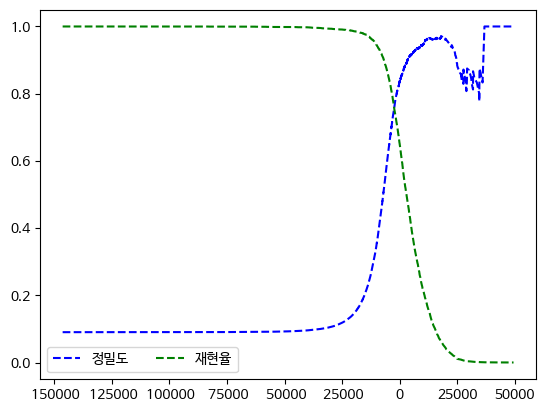

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g--", label="재현율")
    # 임곗값을 표시하고 범례, 축 이름, 그리드를 추가합니다.
    plt.legend(loc='best', ncol=2)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [27]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [28]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [29]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### 3.3.5 ROC 곡선

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

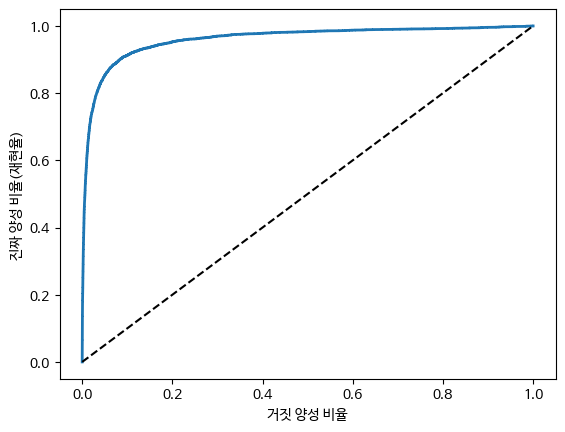

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')   # 대각 점선
    plt.xlabel("거짓 양성 비율")
    plt.ylabel("진짜 양성 비율(재현율)")

plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method = "predict_proba")

In [35]:
y_scores_forest = y_probas_forest[:, 1]   # 양성 클래스에 대한 확률을 점수로 사용합니다,
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

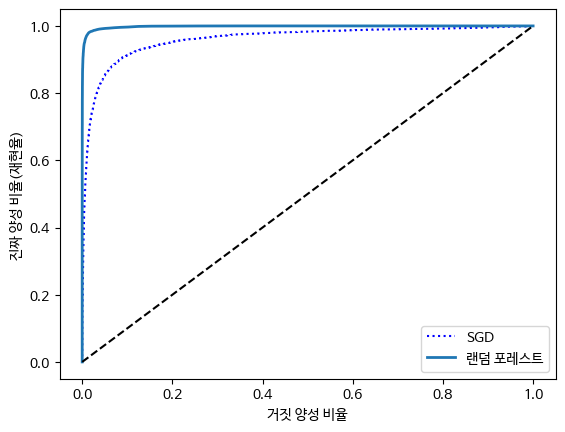

In [36]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## 3.4 다중 분류

In [38]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)   # y_train_5가 아니고 y_train을 사용합니다.
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [39]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [40]:
np.argmax(some_digit_scores)

5

In [41]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
svm_clf.classes_[5]

5

In [43]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
len(ovr_clf.estimators_)

10

In [45]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [48]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [49]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## 3.5 에러 분석

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

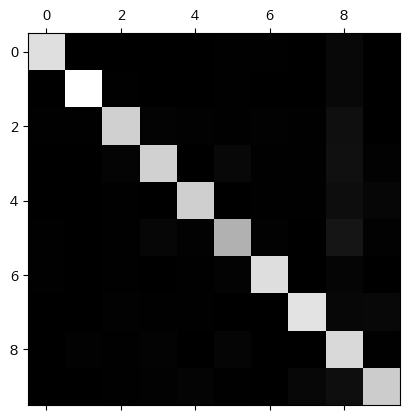

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [53]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

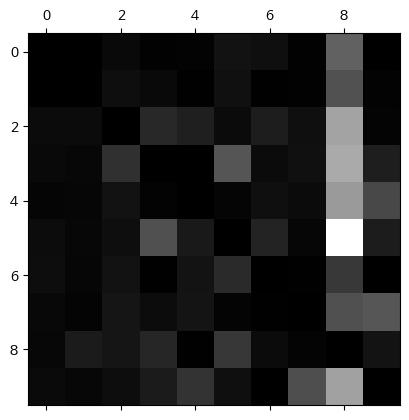

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [55]:
# 맷플롯립의 imshow() 사용하는 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

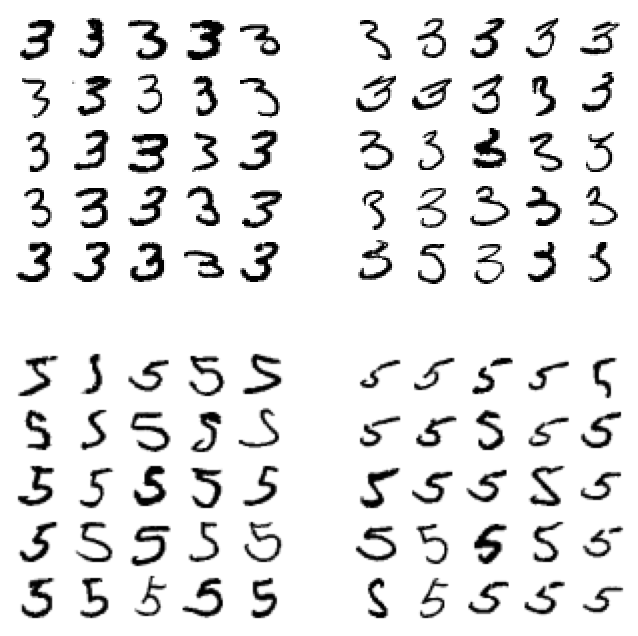

In [56]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 3.6 다중 레이블 분류

In [57]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [58]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.976410265560605


## 3.7 다중 출력 분류

In [60]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [61]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

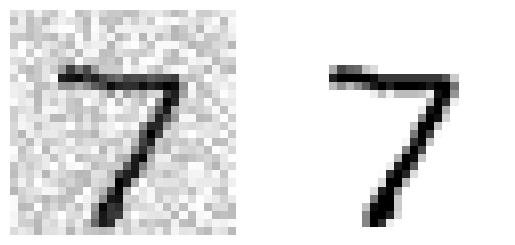

In [63]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
# save_fig("noisy_digit_example_plot")
plt.show()

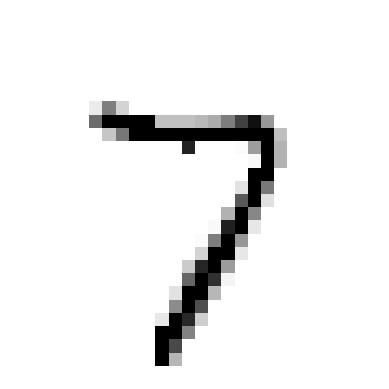

In [64]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)